# PROJET1 :   ANALYSE DES DONNÉES DES UNIVERSITÉS AMÉRICAINES

Problématique
Quels sont les critères pertinents qui poussent un étudiant a préférer une université par rapport a une autre ?

A quel type d'etudiants, les universités doivent faire une offre d'admission afin de garder leur qualité en terme de bon etudiants et de reputation, et qui sont susceptible d'accepter l'offre

Quels sont les critères pertinent qui poussent un étudiant a préférer une université par rapport a une autre

quels sont les caractéristiques pertinent qui poussent les étudiant a choisir leur université

Question1: quelles sont les 20 universités qui ont reçu le plus grand nombre de candidatures

Question2: y'a-t-il une corrélation entre le nombre de candidature, et le nombre d'admissions et le nombre dínscription?

Question3: classement des universités selon le nombre de candidatures d'admission et d'inscrits

question4: Est-ce que les universités avce un nombre élevé d'admissions sont -elle les plus préférées pour les étudiants

Question5: Les étudiants péfèrent-ils les universités publiques ou privées?

Question6: Y'a-t-il une relation entre le taux d'inscription et le type des universités(publique ou privée)

Import des packages



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import seaborn as sns

In [109]:
data = pd.read_excel("data_universite.xlsx")
pd.set_option('display.max_columns', None)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(116), int64(2), object(27)
memory usage: 1.7+ MB


In [111]:
data.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or

Compréhension de la base de donnée

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(116), int64(2), object(27)
memory usage: 1.7+ MB


Nettoyage

On constate un nombre important de variables dans notre base de  données, alors nous allons uniquement sélectionner les varibles 
qui cadre avec nos objectifs d'ananlyse. 

les variables qui seront utiliser pour notre analyse sont:

Name = universités

Applicants total = total des candidats 

Admissions total = total des admissions

Enrolled total   

Total price for in-state students living on campus 2013-14 = prix total pour les etudiants americain vivant sur le campus 

Total price for out-of-state students living on campus 2013-14 = prix total pour les etudiants etranger  vivant sur le campus

Control of institution = université privé ou public

Total  enrollment = total des inscrits

In [113]:
colonnes_retenues = ['Name','Applicants total',
                     'Admissions total','Enrolled total',
                     'Total price for in-state students living on campus 2013-14',
                     'Total price for out-of-state students living on campus 2013-14',
                     'Control of institution','Total  enrollment'
                    ]

In [114]:
data = data[colonnes_retenues]

In [115]:
data

,Name,Applicants total,Admissions total,Enrolled total,Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Control of institution,Total enrollment
0,Alabama A & M University,6142.0,5521.0,1104.0,21849.0,27441.0,Public,5020.0
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,22495.0,31687.0,Public,18568.0
2,Amridge University,NaN,NaN,NaN,NaN,NaN,Private not-for-profit,631.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,23466.0,35780.0,Public,7376.0
4,Alabama State University,10245.0,5251.0,1479.0,18286.0,25222.0,Public,6075.0
...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,393.0,136.0,86.0,NaN,NaN,Public,1877.0
1530,The Kingâ€™s College,3033.0,2158.0,127.0,48717.0,48717.0,Private not-for-profit,516.0
1531,Ottawa University-Online,NaN,NaN,NaN,NaN,NaN,Private not-for-profit,458.0
1532,Providence Christian College,122.0,65.0,20.0,38602.0,38602.0,Private not-for-profit,66.0


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 8 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1534 non-null   object 
 1   Applicants total                                                1377 non-null   float64
 2   Admissions total                                                1377 non-null   float64
 3   Enrolled total                                                  1377 non-null   float64
 4   Total price for in-state students living on campus 2013-14      1400 non-null   float64
 5   Total price for out-of-state students living on campus 2013-14  1400 non-null   float64
 6   Control of institution                                          1534 non-null   object 
 7   Total  enrollment                                   

In [117]:
data.head()

,Name,Applicants total,Admissions total,Enrolled total,Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Control of institution,Total enrollment
0,Alabama A & M University,6142.0,5521.0,1104.0,21849.0,27441.0,Public,5020.0
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,22495.0,31687.0,Public,18568.0
2,Amridge University,NaN,NaN,NaN,NaN,NaN,Private not-for-profit,631.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,23466.0,35780.0,Public,7376.0
4,Alabama State University,10245.0,5251.0,1479.0,18286.0,25222.0,Public,6075.0


In [118]:
data.tail()

,Name,Applicants total,Admissions total,Enrolled total,Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Control of institution,Total enrollment
1529,University of South Florida-Sarasota-Manatee,393.0,136.0,86.0,NaN,NaN,Public,1877.0
1530,The Kingâ€™s College,3033.0,2158.0,127.0,48717.0,48717.0,Private not-for-profit,516.0
1531,Ottawa University-Online,NaN,NaN,NaN,NaN,NaN,Private not-for-profit,458.0
1532,Providence Christian College,122.0,65.0,20.0,38602.0,38602.0,Private not-for-profit,66.0
1533,Polytechnic University of Puerto Rico-Orlando,NaN,NaN,NaN,NaN,NaN,Private not-for-profit,125.0


In [119]:
data.isna().sum()

Name                                                                0
Applicants total                                                  157
Admissions total                                                  157
Enrolled total                                                    157
Total price for in-state students living on campus 2013-14        134
Total price for out-of-state students living on campus 2013-14    134
Control of institution                                              0
Total  enrollment                                                   2
dtype: int64

In [120]:
data.duplicated().sum()

0

In [121]:
#le pourecentage des valeurs manquantes
missing_value = data.isna().sum()
percent = (missing_value/len(data)*100)
missing_table = pd.DataFrame({'valeurs manquantes': missing_value, 'pourcentage': percent})

In [122]:
missing_table

,valeurs manquantes,pourcentage
Name,0,0.000000
Applicants total,157,10.234681
Admissions total,157,10.234681
Enrolled total,157,10.234681
Total price for in-state students living on campus 2013-14,134,8.735332
Total price for out-of-state students living on campus 2013-14,134,8.735332
Control of institution,0,0.000000
Total enrollment,2,0.130378


<AxesSubplot:>

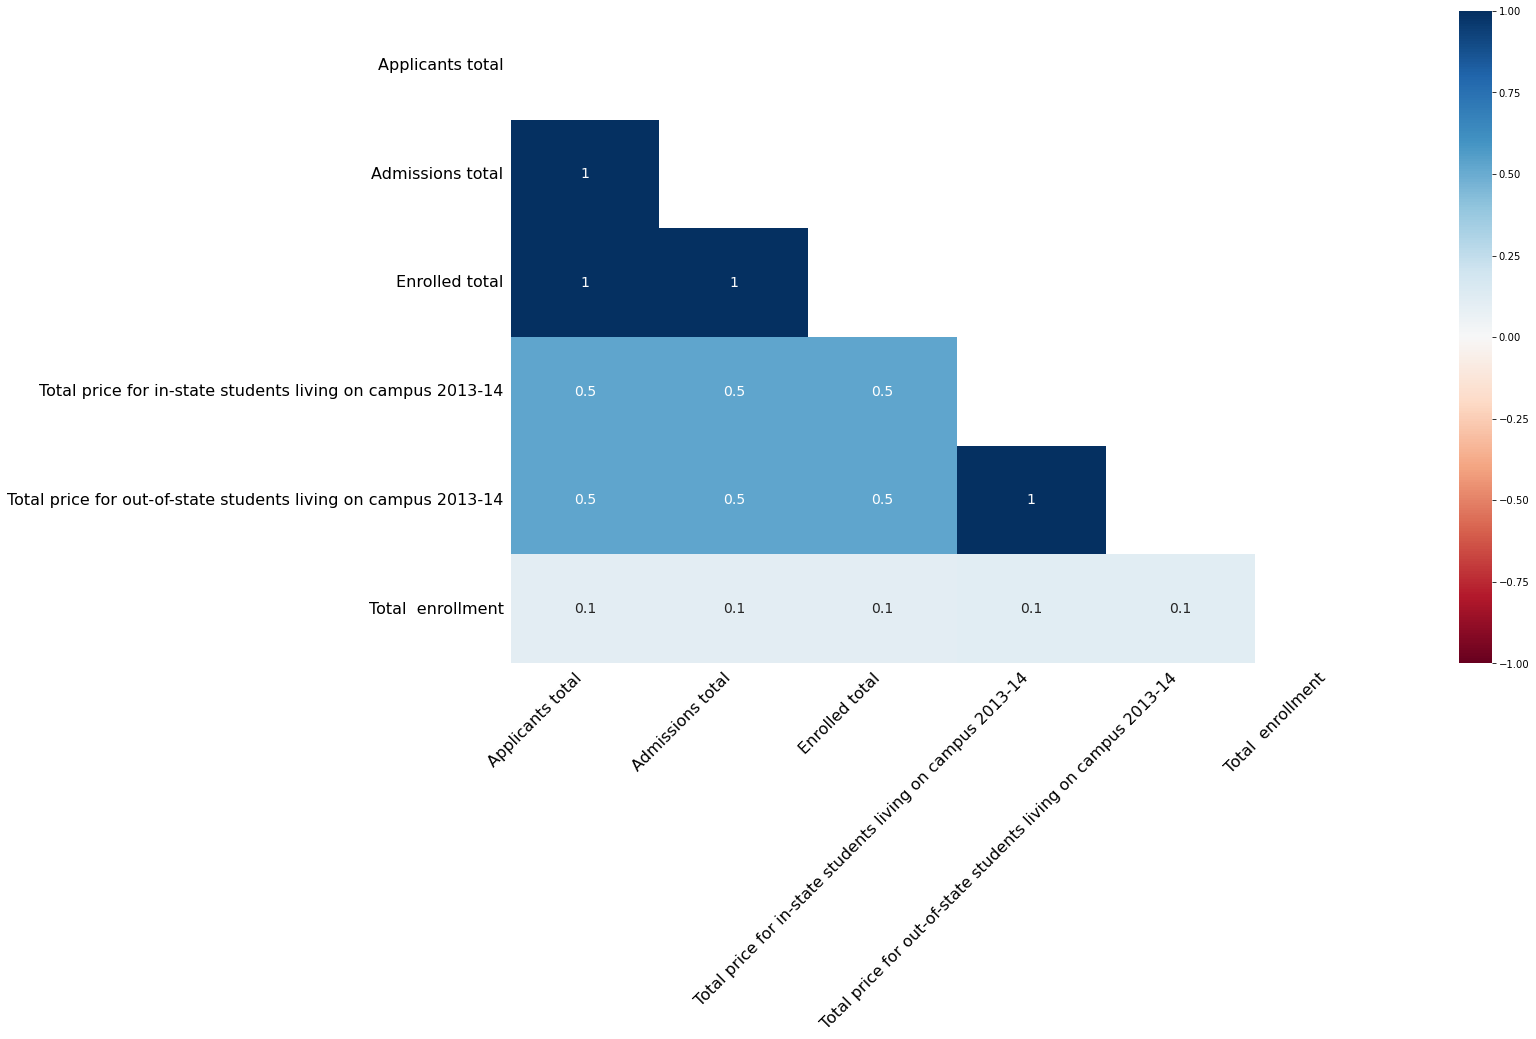

In [123]:
#Identifions le type de valeurs manquantes
msno.heatmap(data)

On constate de fortes corrélation entre les valeurs manquantes, il s'agit des MAR(aléatoires) données manquantes aléatoires
missing are random

les valeurs manquantes dépendent des autres données observées mais pas des données manquantes

si nous avions les valeur pour d'autre années antérieur, nous aurions pu remplacer par la moyenne les valeurs manquantes

mais ici on a uniquement les valeurs pour la période 2013-14

donc on va simplement supprimer les nan.

In [124]:
data = data.dropna(subset = ['Applicants total',
                     'Admissions total','Enrolled total',
                     'Total price for in-state students living on campus 2013-14',
                     'Total price for out-of-state students living on campus 2013-14','Total  enrollment'])

In [125]:
data.isna().sum()

Name                                                              0
Applicants total                                                  0
Admissions total                                                  0
Enrolled total                                                    0
Total price for in-state students living on campus 2013-14        0
Total price for out-of-state students living on campus 2013-14    0
Control of institution                                            0
Total  enrollment                                                 0
dtype: int64

In [126]:
#indentifons le nombre de ligne restante
data.shape

(1326, 8)

In [127]:
#On constate que les nom de colonne ont des espaces et des carctères spéciaux ce qui peut engendrer des érreurs. et donc
#on va remplacer les caractères spéciaux et les espaces par le tiret du 8.

In [128]:
#créons une fonction pour le faire
def supprimer_espace(nom_colonne):
    liste=[]
    mot_colonne = nom_colonne.split()
    size = int(len(mot_colonne))
    for i in range(size):
        if i < size -1:
            liste.append(mot_colonne[i]+'_')
        else:
            liste.append(mot_colonne[i])
        
    nouveau_nom_colonne = ''.join(liste)
    return nouveau_nom_colonne

In [129]:
supprimer_espace('Total price for in-state students living on campus 2013-14')

'Total_price_for_in-state_students_living_on_campus_2013-14'

In [130]:
#creer un bout de code qui va nous permettre de transformer nos colonnes d'un coup 
liste_nouveau_nom_colonne =[]
colonnes = data.columns 
for i in colonnes: 
    nouvelle_colonnes = supprimer_espace(i) 
    liste_nouveau_nom_colonne.append(nouvelle_colonnes)

In [131]:
liste_nouveau_nom_colonne

['Name',
 'Applicants_total',
 'Admissions_total',
 'Enrolled_total',
 'Total_price_for_in-state_students_living_on_campus_2013-14',
 'Total_price_for_out-of-state_students_living_on_campus_2013-14',
 'Control_of_institution',
 'Total_enrollment']

In [132]:
data.columns = liste_nouveau_nom_colonne

In [133]:
data.head()

,Name,Applicants_total,Admissions_total,Enrolled_total,Total_price_for_in-state_students_living_on_campus_2013-14,Total_price_for_out-of-state_students_living_on_campus_2013-14,Control_of_institution,Total_enrollment
0,Alabama A & M University,6142.0,5521.0,1104.0,21849.0,27441.0,Public,5020.0
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,22495.0,31687.0,Public,18568.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,23466.0,35780.0,Public,7376.0
4,Alabama State University,10245.0,5251.0,1479.0,18286.0,25222.0,Public,6075.0
5,The University of Alabama,30975.0,17515.0,6454.0,27000.0,41500.0,Public,34752.0


statistique descriptive

In [134]:
#obtenir une idée global de la nouvelle population que nous aurons a traiter 
#pour le minimum on a 4 pour le total des candidatures, egalement 4 pour le total des admissions
#et 2 pour le total des inscrits
#cela nous ammene a nous demamnder a qui appartient ces valeurs parce que 2 inscriptions uniquement pour une 
#année universitaire nous amene a nous poser des questions 
data.describe()

,Applicants_total,Admissions_total,Enrolled_total,Total_price_for_in-state_students_living_on_campus_2013-14,Total_price_for_out-of-state_students_living_on_campus_2013-14,Total_enrollment
count,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000
mean,6562.079186,3638.870287,1064.596531,35607.657617,39457.417798,7501.159879
std,8887.252631,4346.785651,1297.577558,13211.675469,10464.105131,9664.482557
min,4.000000,4.000000,2.000000,11398.000000,11398.000000,66.000000
25%,1595.500000,995.250000,298.000000,23172.250000,31842.000000,1701.000000
50%,3452.000000,2092.500000,545.000000,35185.000000,37902.000000,3414.000000
75%,7135.250000,4347.750000,1265.750000,45469.500000,46323.000000,8943.750000
max,72676.000000,35815.000000,10241.000000,64988.000000,64988.000000,77338.000000


In [135]:
#Applicants tota
# count = 1326.000000 universités
# mean = 6562.079186 candidature moyenne par université
# std = 8887.252631 il y a une forte dispersion de candidature entre les universités entre des université qui ont un fort taux 
# de candidature et d'autre qui ont un faible taux de candidature 


In [136]:
#cherchons a qui appartient ces valeur
data[['Name','Applicants_total']].sort_values('Applicants_total').head(20)
#on constate que les candidature de 4 sont pour Goddard College et donc on va vérifier que ces valeurs soit conforme car
#4 candidature pour une école ça fait peu
#et donc on  va aller sur le site : https://datausa.io/profile/university/goddard-college#admission
#pour l'annee 2014 on constate que l'on a 7 candidatures et 7 admissions; pour l'année 2015 c'est 12 candidatures et 12 admissions
#pour 2016 c'est 16 candidatures et 12 admissions, 2017 c'est 4 candidatures et 4 admissions
#et donc on peut conclure que c'est normal d'avoir 4 comme valeur pour Goddard College car chaque année il a un nombre
#limité de candidature et d'admission.

,Name,Applicants_total
1343,Goddard College,4.0
1354,Sterling College,49.0
396,Maharishi University of Management,74.0
155,Naropa University,79.0
105,American Jewish University,100.0
1222,Aquinas College,119.0
1532,Providence Christian College,122.0
67,Alliant International University,128.0
1489,Beacon College,139.0
614,Kuyper College,152.0


 Question1: quel sont les universités ayant reçu le plus grand nombre de candidature

In [137]:
top_univ_cand = data[['Name','Applicants_total']].sort_values('Applicants_total',ascending = False).head(20)

In [138]:
top_univ_cand

,Name,Applicants_total
84,University of California-Los Angeles,72676.0
81,University of California-Berkeley,61717.0
86,University of California-San Diego,60832.0
841,New York University,57845.0
83,University of California-Irvine,56515.0
87,University of California-Santa Barbara,55258.0
77,California State University-Long Beach,55019.0
863,St John's University-New York,51634.0
126,San Diego State University,51163.0
82,University of California-Davis,49820.0


Text(0, 0.5, 'Université')

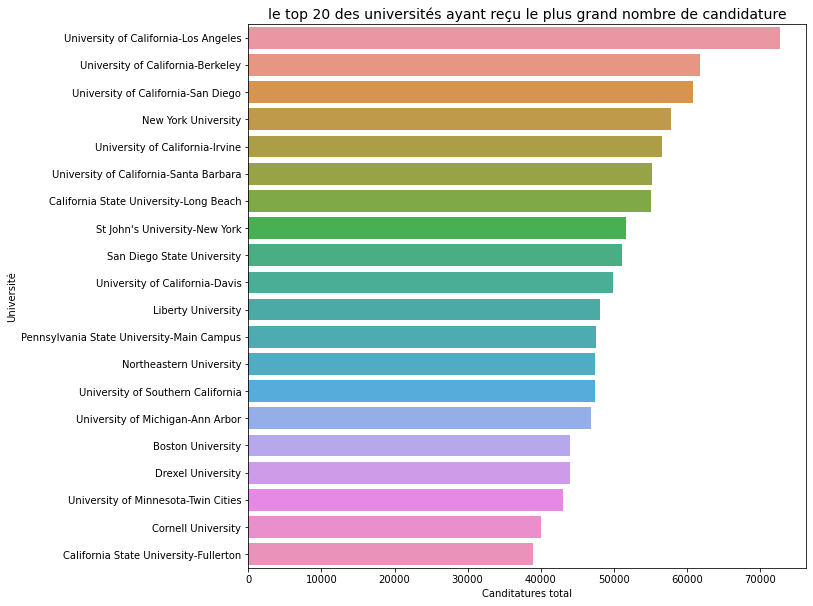

In [139]:
#représentation graphique
plt.figure(figsize = (10,10))
sns.barplot(x='Applicants_total', y='Name', data = top_univ_cand)
plt.title("le top 20 des universités ayant reçu le plus grand nombre de candidature", fontsize=14)
plt.xlabel("Canditatures total")
plt.ylabel("Université")

Question2: y'a t'il une correlation entre le nombre de candidature, le nombre d'admission , et le nombre d'inscription

In [140]:
#on va creer une nouvelle variable pour stoker les variables dont nous avons besoins
data1 = data[['Applicants_total', 'Admissions_total','Enrolled_total']]

In [141]:
data1.head()

,Applicants_total,Admissions_total,Enrolled_total
0,6142.0,5521.0,1104.0
1,5689.0,4934.0,1773.0
3,2054.0,1656.0,651.0
4,10245.0,5251.0,1479.0
5,30975.0,17515.0,6454.0


In [142]:
correlation = data1.corr()

In [143]:
correlation 

,Applicants_total,Admissions_total,Enrolled_total
Applicants_total,1.000000,0.853196,0.783967
Admissions_total,0.853196,1.000000,0.883784
Enrolled_total,0.783967,0.883784,1.000000


on constate qu'il ya une forte correlation entre les candidatures et les admission 0.85

il ya une forte correlation entre les candidatures et les inscriptions 0.78

il ya une forte correlation entre les admission et les inscriptions 0.88

alors on peut dire que 
tant que le nombre de candidature augmente celui des admissions augmente aussi

tant que le nombre de des admissions augmente , celui des inscriptions augmente aussi

<AxesSubplot:>

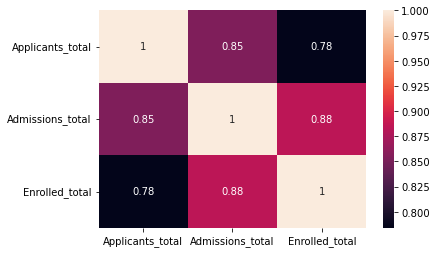

In [144]:
#Représenattion graphique
sns.heatmap(correlation, annot = True)

 Question3: Nombre des universités en fonction du nombre de candidature, d'admission et d'inscrit

Nombre d'universités selon le nombre de candidature:

la mediane est :3452.00


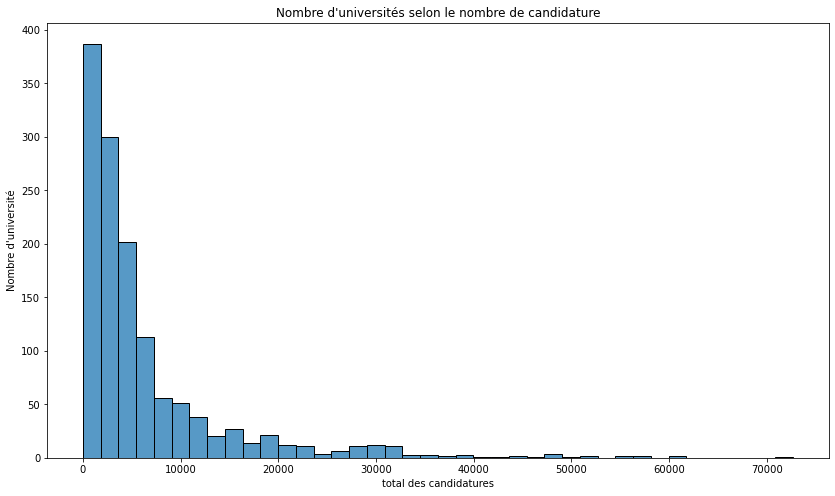

In [148]:
plt.figure(figsize=(14,8))
sns.histplot(data['Applicants_total'], bins=40)
plt.xlabel("total des candidatures")
plt.ylabel("Nombre d'université")
plt.title("Nombre d'universités selon le nombre de candidature")

median = "la mediane est :{:.2f}".format(data['Applicants_total'].median())

print(median)


Environs la moitier des universités soit 200 reçoivent moins de 5000 candidatures.

Au-delà de 3000 candidatures il ya un nombre de plus en plus restraint d'université qui reçoivent plus de 3000 candidatures 

Nombre d'universités selon le nombre d'admission:

la mediane est :2092.50


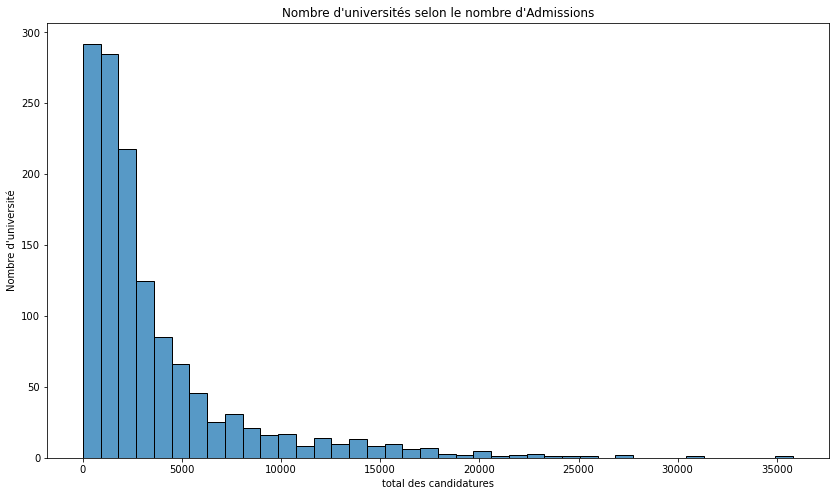

In [149]:
plt.figure(figsize=(14,8))
sns.histplot(data['Admissions_total'], bins=40)
plt.xlabel("total des candidatures")
plt.ylabel("Nombre d'université")
plt.title("Nombre d'universités selon le nombre d'Admissions")

median = "la mediane est :{:.2f}".format(data['Admissions_total'].median())

print(median)


Nous avons moins d'universités ayant admis des candandidats que d'université
ayant reçu des candidatures

la majorité des universités accèptent moins de 2500 candidatures 
au-delà de 2500 candidatures, il y a de moins en moins d'université qui 
admenttent des candidats

Nombre d'universités selon le nombre d'inscrit

La médianne est :545.00


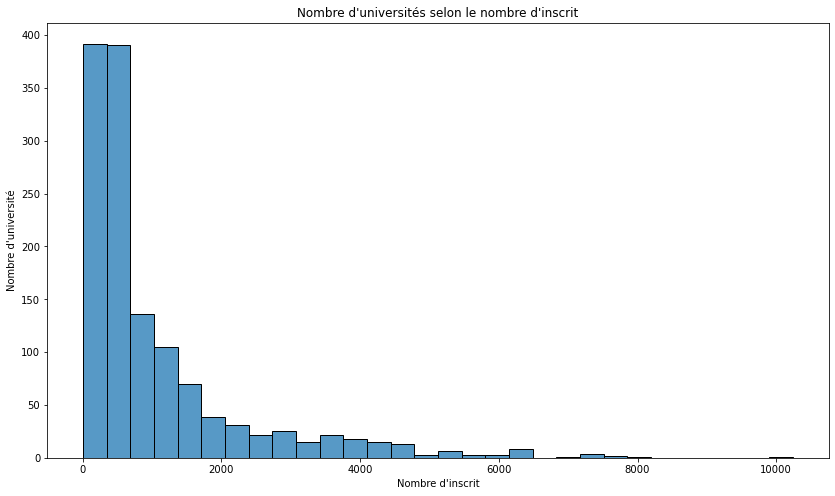

In [155]:
plt.figure(figsize=(14,8))

sns.histplot(data['Enrolled_total'], bins= 30 )
plt.title("Nombre d'universités selon le nombre d'inscrit")
plt.xlabel("Nombre d'inscrit")
plt.ylabel("Nombre d'université")




mediane = "La médianne est :{:.2f}".format(data['Enrolled_total'].median())

print(mediane)

La majorités des université enregistre moins de 600 inscrit, au-delà 
nous avons un nombre restraint d'université qui enregistre plus de 1000 inscrits

Question4: est-ce que les universités avec un nombre élevé d'admissions sont-elles les plus préférées par les etudiants

In [157]:
#on va croiser le nombre de candidature et d'admission tout en distinguant les établissements privé et public

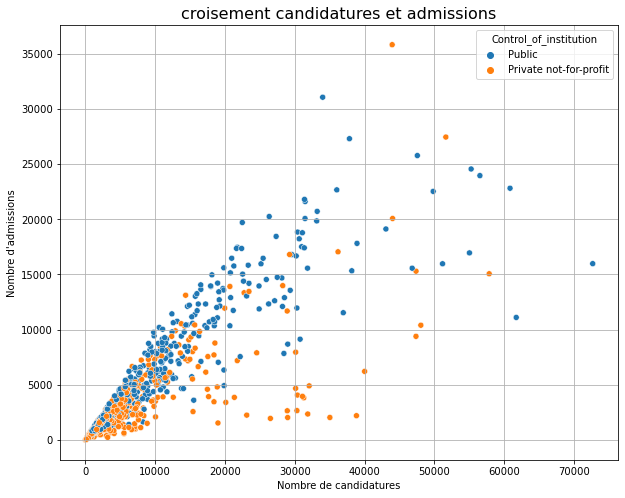

In [158]:
plt.figure(figsize =(10,8))
sns.scatterplot(x = data.Applicants_total, y= data.Admissions_total, hue = data.Control_of_institution)
plt.xlabel("Nombre de candidatures")
plt.ylabel("Nombre d'admissions")
plt.title("croisement candidatures et admissions", fontsize = 16)
plt.grid()

On constate que le nombre d'admission croit avec le nombre de candidatures, les établissements publics ont tendance a admettre 
plus de candidat de les établissements privés, mais on constate également  les établissement qui reçoivent le plus de candidatures
ne sont pas forcément celle qui admettent le plus de candidat.

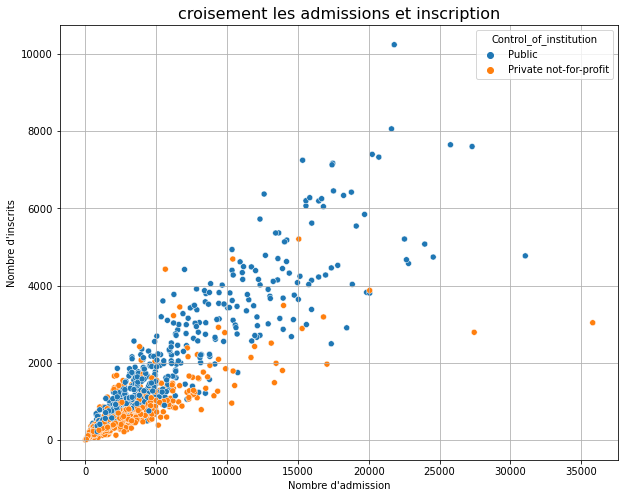

In [161]:
plt.figure(figsize =(10,8))
sns.scatterplot(x = data.Admissions_total, y= data.Enrolled_total, hue = data.Control_of_institution)
plt.xlabel("Nombre d'admission")
plt.ylabel("Nombre d'inscrits")
plt.title("croisement les admissions et inscription", fontsize = 16)
plt.grid()

On constate que le nombre d'inscrit augmente avec le nombre d'admissions, et on a tendance a avoir plus d'inscrit dans les universités
public que dan les universités privées, et un nombre d'admission élevé ne garanti pas un nécéssairement un grand nombre d'inscrit 

attention ce raisonnement se base  le nombre d'admission et le nombre d'inscrit ,ce qui peut fausser 

nos conclusions a la question si les universités avec un nombre élevé d'admissions sont-elles les plus préférées par les etudiants

et pour répondre a cette question nous devons nous baser sur la proportion et donc le taux

In [164]:
#alors on va calculer le taux d'inscription
#et croiser le nombre d'admission avec le taux d'inscription
#et on va creer une nouvelle colonne qui va s'appeller taux d'inscription
data['Taux_inscription'] = (data.Enrolled_total/data.Admissions_total*100).round(2)
#arrondir a deux : round(2)

C:\Users\Lenoovo\AppData\Local\Temp\ipykernel_10056\669242991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Taux_inscription'] = (data.Enrolled_total/data.Admissions_total*100).round(2)


In [165]:
data

,Name,Applicants_total,Admissions_total,Enrolled_total,Total_price_for_in-state_students_living_on_campus_2013-14,Total_price_for_out-of-state_students_living_on_campus_2013-14,Control_of_institution,Total_enrollment,Taux_inscription
0,Alabama A & M University,6142.0,5521.0,1104.0,21849.0,27441.0,Public,5020.0,20.00
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,22495.0,31687.0,Public,18568.0,35.93
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,23466.0,35780.0,Public,7376.0,39.31
4,Alabama State University,10245.0,5251.0,1479.0,18286.0,25222.0,Public,6075.0,28.17
5,The University of Alabama,30975.0,17515.0,6454.0,27000.0,41500.0,Public,34752.0,36.85
...,...,...,...,...,...,...,...,...,...
1515,Johnson & Wales University-Charlotte,4543.0,2708.0,613.0,41663.0,41663.0,Private not-for-profit,2325.0,22.64
1516,Ave Maria University,1611.0,960.0,254.0,36860.0,36860.0,Private not-for-profit,988.0,26.46
1525,University of South Florida-St Petersburg,3195.0,1406.0,562.0,20170.0,31086.0,Public,4660.0,39.97
1530,The Kingâ€™s College,3033.0,2158.0,127.0,48717.0,48717.0,Private not-for-profit,516.0,5.89


In [166]:
#il est préferable de travailler sur les taux que sur les nombres car les nombre peuvent fausser une conclusion

Text(0.5, 1.0, 'croisement des admission et le taux des inscriptions')

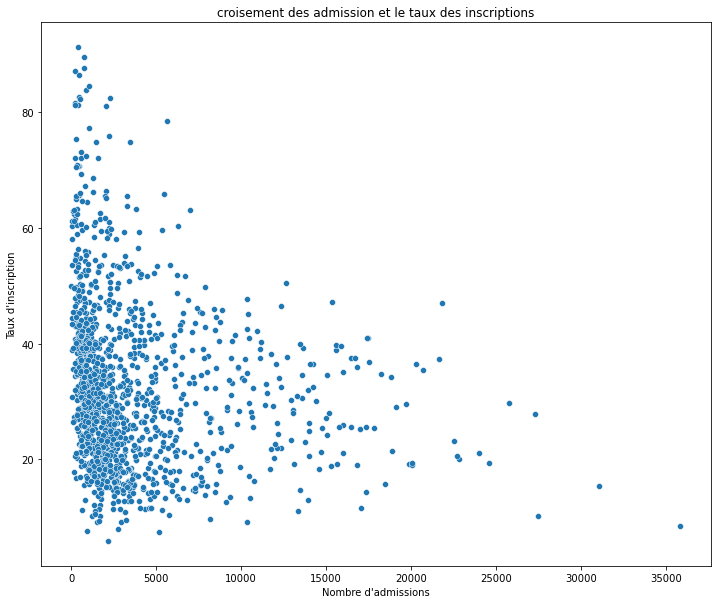

In [167]:
#représentons graphiquement le  croisement du taux d'inscription et le nombre d'admission
plt.figure(figsize=(12,10))
sns.scatterplot(x=data.Admissions_total, y= data.Taux_inscription)
plt.xlabel("Nombre d'admissions")
plt.ylabel("Taux d'inscription")
plt.title("croisement des admission et le taux des inscriptions")

si on devait projeter une coubre elle serait decroissante , alors on peut se dire que

que plus le taux d'insciption est élevé, et moins il y a d'admission 

et quand le nombre d'admission augmente le taux d'inscription diminue

les université qui ont un nombre d'admission moins élevés sont cellle qui enregiste le plus fort taux  d'inscription 

un grand nombre d'admission ne signifit pas qu'une université est préféré par les étudiants 

Question5: les étudiants préférent-ils les universités public ou privées

Text(0, 0.5, 'Nombre de candidature')

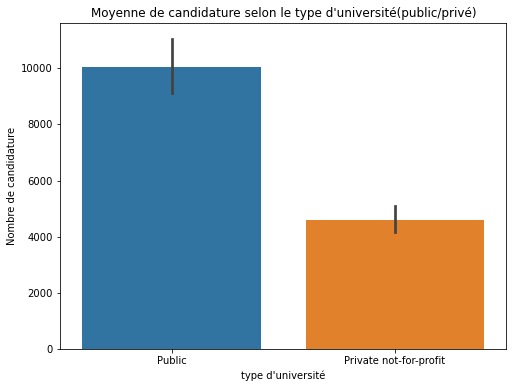

In [170]:
plt.figure(figsize=(8,6))
sns.barplot(x= data.Control_of_institution, y=data.Applicants_total)
plt.title("Moyenne de candidature selon le type d'université(public/privé)")
plt.xlabel("type d'université")
plt.ylabel("Nombre de candidature")

In [171]:
#la moyenne des candidature pour le public est pratiquement le double de celui des établissement privé
#ça peut etre expliqué par plusiseurs variable ,comme le cout , les formation etc

croisement du nombre de candidature et du nombre d'université (selon type public ou privé)

In [168]:
#on va subdiviser notre ensemble de données data,en deux dataframe, l'une pour le public et l'autre pour le priver
data_univ_prive= data[data.Control_of_institution == "Private not-for-profit"]

In [169]:
data_univ_prive.head()
#on a bien que des université privé

,Name,Applicants_total,Admissions_total,Enrolled_total,Total_price_for_in-state_students_living_on_campus_2013-14,Total_price_for_out-of-state_students_living_on_campus_2013-14,Control_of_institution,Total_enrollment,Taux_inscription
9,Birmingham Southern College,1931.0,1240.0,356.0,45470.0,45470.0,Private not-for-profit,1188.0,28.71
12,Huntingdon College,1470.0,923.0,261.0,33885.0,33885.0,Private not-for-profit,1110.0,28.28
14,Judson College,268.0,198.0,68.0,28840.0,28840.0,Private not-for-profit,347.0,34.34
17,University of Mobile,866.0,617.0,259.0,32570.0,32570.0,Private not-for-profit,1610.0,41.98
20,Oakwood University,2728.0,937.0,409.0,36295.0,36295.0,Private not-for-profit,1903.0,43.65


In [172]:
data_univ_public= data[data.Control_of_institution == "Public"]

In [173]:
data_univ_public.head()
#on a bien que des université public

,Name,Applicants_total,Admissions_total,Enrolled_total,Total_price_for_in-state_students_living_on_campus_2013-14,Total_price_for_out-of-state_students_living_on_campus_2013-14,Control_of_institution,Total_enrollment,Taux_inscription
0,Alabama A & M University,6142.0,5521.0,1104.0,21849.0,27441.0,Public,5020.0,20.00
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,22495.0,31687.0,Public,18568.0,35.93
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,23466.0,35780.0,Public,7376.0,39.31
4,Alabama State University,10245.0,5251.0,1479.0,18286.0,25222.0,Public,6075.0,28.17
5,The University of Alabama,30975.0,17515.0,6454.0,27000.0,41500.0,Public,34752.0,36.85


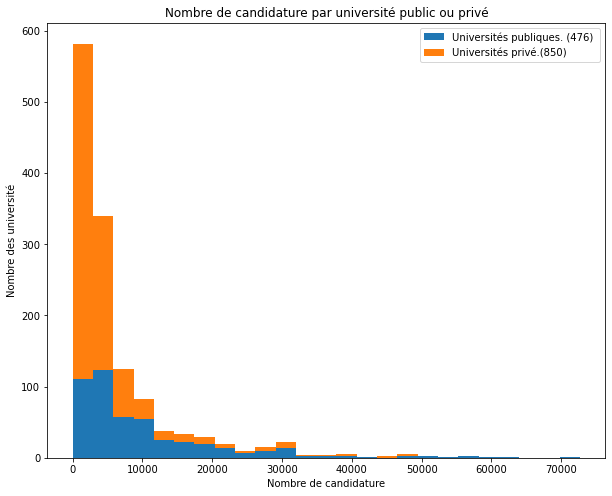

In [174]:
plt.figure(figsize=(10,8))
plt.hist([data_univ_public.Applicants_total,data_univ_prive.Applicants_total], bins = 25, stacked = True)

plt.title("Nombre de candidature par université public ou privé")
plt.xlabel("Nombre de candidature")
plt.ylabel("Nombre des université")
plt.legend(['Universités publiques. ({}) '.format(len(data_univ_public)),
           "Universités privé.({}) ".format(len(data_univ_prive))])
           
           
#stacked = True pour le graphique empilée

on constate que l'on a plus d'duniversité privé(850) que d'université public(476)
les université qui reçoivent moins de 5k candidature sont majoritairement privé